# Hunting Pressure Score
Sanderson et al. (2002) and Venter et al (2016) created a global model for the impact of hunting around inhabitations and along roads by assigning a pressure score of 0.2 for 0-0.5 km around inhabitations or roads (here including the banks of the Purari River and navigable tributaries), and a score of 0.6 at 0.5 km decaying exponentially out to a score of 1 at 16 km. Based on data from the Crater Mountain Wildlife Management Area (Mack & West 2005), this model is adjusted to a score of 0.2 for 0-1.6 km around inhabitations (based on mean distance from smaller ‘new’ villages to kills), decaying exponentially out to 1 at 10 km (based on twice the mean distance from larger ‘old’ villages to kills). A similar model applies to fishing around inhabitations (including those on the shores of Orokolo Bay) and along rivers. 

# Roads 

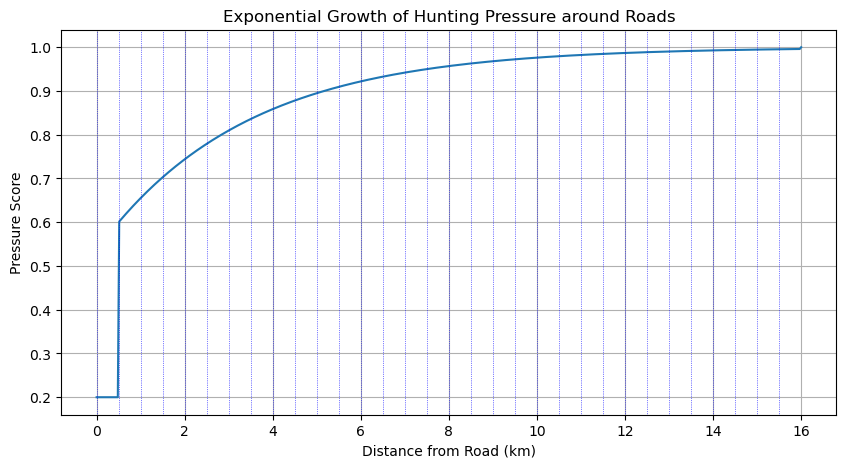

In [77]:
import numpy as np
import matplotlib.pyplot as plt

def exponential_growth_roads(distance, start_point, end_point, start_value, end_value):
    if distance <= start_point:
        return 0.2
    elif distance >= end_point:
        return end_value
    else:
        # Properly adjusting 'k' for smooth growth from 'start_value' at 'start_point' to 'end_value' at 'end_point'
        k = -np.log(0.01) / (end_point - start_point)  # Ensuring it reaches near 'end_value' at 'end_point'
        return start_value + (end_value - start_value) * (1 - np.exp(-k * (distance - start_point)))

distances = np.linspace(0, 16, 500)
scores = [exponential_growth_roads(d, 0.5, 16, 0.6, 1) for d in distances]

# Plotting the results
plt.figure(figsize=(10, 5))
plt.plot(distances, scores, label=None)
plt.xlabel('Distance from Road (km)')
plt.ylabel('Pressure Score')
plt.title('Exponential Growth of Hunting Pressure around Roads')
plt.grid(True)

for x in np.arange(0, 16, 0.5):  # Adjust the maximum value as necessary for your plot range
    plt.axvline(x=x, color='blue', linestyle=':', linewidth=0.5)
    
plt.show()

In [70]:
score = exponential_growth_roads(4, 0.5, 16, 0.6, 1) # first value is the distance
score

0.8586007557987958

# Inhabitations

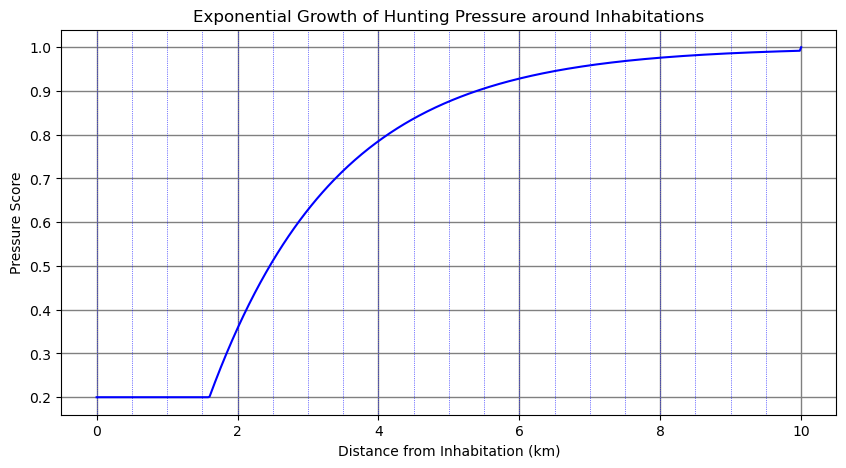

In [55]:
import numpy as np
import matplotlib.pyplot as plt

def exponential_growth_inhabitations(distance, start_point, end_point, start_value, end_value):
    if distance <= start_point:
        return start_value  # Return the constant score within the initial range
    elif distance >= end_point:
        return end_value  # Return the end value beyond the exponential growth end point
    else:
        # Adjust 'k' for the new range
        k = -np.log(0.01) / (end_point - start_point)  # Calculating 'k' for the new distance range
        return start_value + (end_value - start_value) * (1 - np.exp(-k * (distance - start_point)))

distances = np.linspace(0, 10, 500)
scores = [exponential_growth_inhabitations(d, 1.6, 10, 0.2, 1) for d in distances]

# Plotting the results
plt.figure(figsize=(10, 5))
plt.plot(distances, scores, label=None, color='blue')
plt.xlabel('Distance from Inhabitation (km)')
plt.ylabel('Pressure Score')
plt.title('Exponential Growth of Hunting Pressure around Inhabitations')
plt.grid(True, linewidth=1, color='gray')

for x in np.arange(0, 10, 0.5):  # Adjust the maximum value as necessary for your plot range
    plt.axvline(x=x, color='blue', linestyle=':', linewidth=0.5)
    
plt.show()

In [76]:
score = exponential_growth_inhabitations(5, 1.6, 10, 0.2, 1) # first value is the distance
score

0.8759587376133899

# Graphical Representation

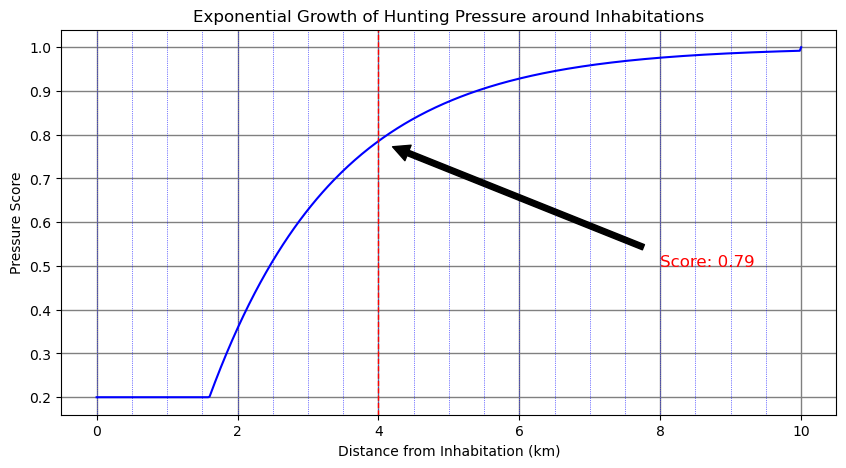

In [74]:
import numpy as np
import matplotlib.pyplot as plt

def exponential_growth(distance, start_point, end_point, start_value, end_value):
    if distance <= start_point:
        return start_value  # Return the constant score within the initial range
    elif distance >= end_point:
        return end_value  # Return the end value beyond the exponential growth end point
    else:
        # Adjust 'k' for the new range
        k = -np.log(0.01) / (end_point - start_point)  # Calculating 'k' for the new distance range
        return start_value + (end_value - start_value) * (1 - np.exp(-k * (distance - start_point)))

distances = np.linspace(0, 10, 500)
scores = [exponential_growth(d, 1.6, 10, 0.2, 1) for d in distances]

# Plotting the results
plt.figure(figsize=(10, 5))
plt.plot(distances, scores, label=None, color='blue')
plt.xlabel('Distance from Inhabitation (km)')
plt.ylabel('Pressure Score')
plt.title('Exponential Growth of Hunting Pressure around Inhabitations')
plt.grid(True, linewidth=1, color='gray')

for x in np.arange(0, 10, 0.5):  # Adjust the maximum value as necessary for your plot range
    plt.axvline(x=x, color='blue', linestyle=':', linewidth=0.5)
    
    
# Adding a vertical line score distance
plt.axvline(x=4, color='red', linestyle='--', linewidth=1)
# Annotating the plot with the score at score distance
plt.annotate(f'Score: {score:.2f}', xy=(4, score), xytext=(8, 0.5),
             arrowprops=dict(facecolor='black', shrink=0.05), fontsize=12, color='red')

    
plt.show()